In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.stats import sem
from scipy.stats import stats

In [2]:
# read the crime data for the city of Manchester in August, 2018

file = ('Resources/final_manchester_crime_data.csv')
mc_pf = pd.read_csv(file)

mc_pf.head()

,Unnamed: 0,CrimeTS,Location,Type,Longitude,Latitude
0,0,2018-08-02 21:29:18,On or near Faraday Street,Violence and sexual offences,-2.125952,53.456924
1,1,2018-08-01 15:29:08,On or near Camborne Road,Violence and sexual offences,-2.445266,53.568947
2,2,2018-08-05 11:29:28,On or near Ashley Road,Criminal damage and arson,-2.354261,53.419073
3,3,2018-08-26 05:21:34,On or near Trust Road,Public order,-2.563494,53.536908
4,4,2018-08-16 01:16:35,On or near Back Elmwood Grove West,Violence and sexual offences,-2.199558,53.513226


In [3]:
# split the time data into date and time
crime_date = [x.split()[0] for x in mc_pf['CrimeTS']]
crime_time = [x.split()[1] for x in mc_pf['CrimeTS']]
mc_pf['Crime Date'] = crime_date
mc_pf['Crime Time'] = crime_time

# structure the time and date data into python datetime object
from datetime import datetime
import time
crime_TS = [datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S") for date_str in mc_pf['CrimeTS']]
mc_pf['CrimeTS'] = crime_TS
mc_pf.head()


,Unnamed: 0,CrimeTS,Location,Type,Longitude,Latitude,Crime Date,Crime Time
0,0,2018-08-02 21:29:18,On or near Faraday Street,Violence and sexual offences,-2.125952,53.456924,2018-08-02,21:29:18
1,1,2018-08-01 15:29:08,On or near Camborne Road,Violence and sexual offences,-2.445266,53.568947,2018-08-01,15:29:08
2,2,2018-08-05 11:29:28,On or near Ashley Road,Criminal damage and arson,-2.354261,53.419073,2018-08-05,11:29:28
3,3,2018-08-26 05:21:34,On or near Trust Road,Public order,-2.563494,53.536908,2018-08-26,05:21:34
4,4,2018-08-16 01:16:35,On or near Back Elmwood Grove West,Violence and sexual offences,-2.199558,53.513226,2018-08-16,01:16:35


In [4]:
# The crime rate data on the days of home games

mc_home_game_1 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-10',  :]
mc_home_game_2 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-19',  :]
mc_home_game_3 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-27',  :]

mc_home_game = pd.concat([mc_home_game_1, mc_home_game_2, mc_home_game_3])

# save the home game crime data
mc_home_game.to_csv('Resources/final_manchester_crime_data_home_game.csv')

In [5]:
# The crime rate data on the days of guest games

mc_guest_game_1 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-12',  :]
mc_guest_game_2 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-19',  :]
mc_guest_game_3 = mc_pf.loc[mc_pf['Crime Date'] == '2018-08-25',  :]

mc_guest_game = pd.concat([mc_guest_game_1, mc_guest_game_2, mc_guest_game_3])

# save the guest game crime data
mc_guest_game.to_csv('Resources/final_manchester_crime_data_guest_game.csv')

In [6]:
# The crime rate data on the days without games

game_days = ['2018-08-10', '2018-08-12', '2018-08-19', '2018-08-25', '2018-08-27']
mc_off_game = mc_pf
for game_day in game_days:
    mc_off_game =  mc_off_game[mc_off_game['Crime Date'] != game_day]

# save the off game day crime data
mc_off_game.to_csv('Resources/final_manchester_crime_data_off_game.csv')


In [7]:
# Group the data by crime date

grouped_date_mc_pf = mc_pf.groupby(['Crime Date'])

crime_counts = grouped_date_mc_pf['CrimeTS'].count()


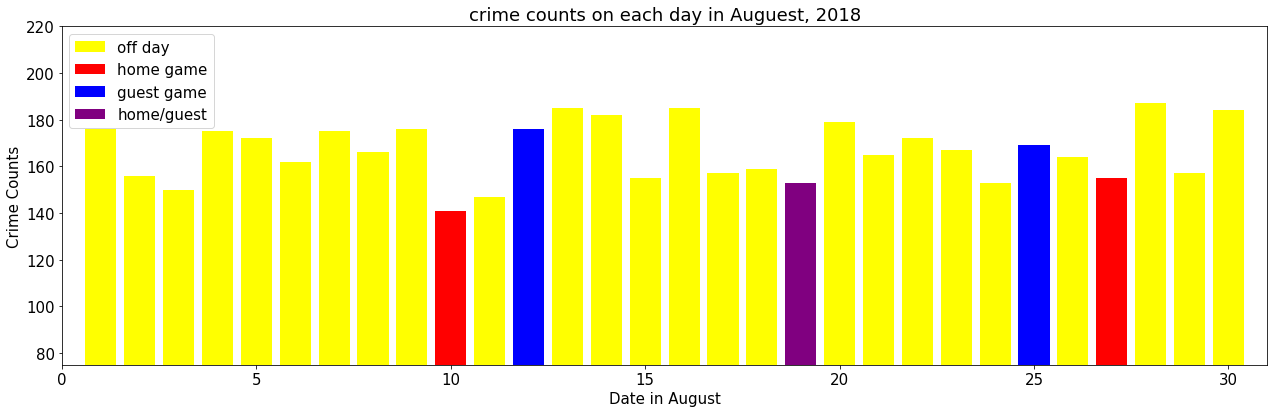

In [132]:
#plots for crime counts on each day in Auguest, 2018

time = np.arange(1, 31, 1)
fig = plt.figure()
fig.set_size_inches((18, 6))
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.size': 15})


plt.bar(time, crime_counts, color = 'yellow', label = 'off day')
plt.bar([10, 27], (crime_counts[9], crime_counts[26]), color = 'red', label = 'home game' )
plt.bar([12, 25], (crime_counts[11], crime_counts[24]), color = 'blue', label = 'guest game'  )
plt.bar(19, crime_counts[18],  color = 'purple',  label = 'home/guest')
plt.xlim(0, 31)
plt.ylim(75, 220)
plt.title('crime counts on each day in Auguest, 2018')
plt.legend(loc = 'best')
plt.xlabel('Date in August')
plt.ylabel('Crime Counts')

plt.savefig('Images/august_crime.png')

In [120]:
# Group the data by crime date based on data on home game days, guest game days, off days

# mean and sem for home game days
home_game_crime = mc_home_game.groupby(['Crime Date'])['CrimeTS'].count()

# mean and sem for guest game days
guest_game_crime = mc_guest_game.groupby(['Crime Date'])['CrimeTS'].count()

# mean and sem for off game days
off_game_crime = mc_off_game.groupby(['Crime Date'])['CrimeTS'].count()


In [128]:
# p-value for home_game_crime and off_game_crime

t, p = stats.ttest_ind(home_game_crime, off_game_crime, equal_var = False )
p

0.027689929762922325

In [130]:
# p-value for guest_game_crime and off_game_crime

t, p = stats.ttest_ind(guest_game_crime, off_game_crime, equal_var = False )
p

0.780107583030166

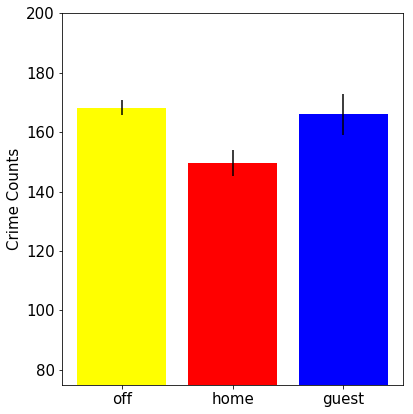

In [142]:
# plot the crime counts data accoring to data on home game days, guest game days, off days

fig = plt.figure()
fig.set_size_inches((6, 6))

rcParams.update({'font.size': 15})

mean_crime = [off_game_crime.mean(), home_game_crime.mean(), guest_game_crime.mean()]
sem_crime = [off_game_crime.sem(), home_game_crime.sem(), guest_game_crime.sem()]
color_crime = ['yellow', 'red', 'blue']

import matplotlib.pyplot as plt
plt.bar(x = [0, 1, 2], height = mean_crime, yerr = sem_crime,   color = color_crime )
plt.ylim(75, 200)
plt.ylabel('Crime Counts')
plt.xticks([0.0, 1.0, 2.0], ['off', 'home', 'guest'])
plt.savefig("Images/crime_counts_general_comparison.png")

In [100]:
# analysis of crime by catogories, off days 

# list of crime types 
crime_type = ["Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", 
              "Possession of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", 
              "Vehicle crime", "Violence and sexual offences"]

off_crime_type_counts = []
off_crime_type_sem = []
off_crime_type_std = []

off_game_crime_type = mc_off_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = off_game_crime_type.loc[off_game_crime_type["Type"] == i, :]
    off_crime_type_counts.append(j.mean())
    off_crime_type_sem.append(j.sem())
    off_crime_type_std.append(j.std())
    
off_crime_type_counts = np.reshape(np.array(off_crime_type_counts), 13)
off_crime_type_sem = np.reshape(np.array(off_crime_type_sem), 13)
off_crime_type_std = np.reshape(np.array(off_crime_type_std), 13)

In [101]:
# analysis of crime by catogories, home games 

home_crime_type_counts = []
home_crime_type_sem = []
home_crime_type_std = []

home_game_crime_type = mc_home_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = home_game_crime_type.loc[home_game_crime_type["Type"] == i, :]
    home_crime_type_counts.append(j.mean())
    home_crime_type_sem.append(j.sem())
    home_crime_type_std.append(j.std())
    
home_crime_type_counts = np.reshape(np.array(home_crime_type_counts), 13)
home_crime_type_sem = np.reshape(np.array(home_crime_type_sem), 13)
home_crime_type_std = np.reshape(np.array(home_crime_type_std), 13)

In [102]:
guest_crime_type_counts = []
guest_crime_type_sem = []
guest_crime_type_std = []

guest_game_crime_type = mc_guest_game.groupby(['Crime Date','Type'])['CrimeTS'].count().reset_index()
for i in crime_type:
    j = guest_game_crime_type.loc[guest_game_crime_type["Type"] == i, :]
    guest_crime_type_counts.append(j.mean())
    guest_crime_type_sem.append(j.sem())
    guest_crime_type_std.append(j.std())
    
guest_crime_type_counts = np.reshape(np.array(guest_crime_type_counts), 13)
guest_crime_type_sem = np.reshape(np.array(guest_crime_type_sem),13)
guest_crime_type_std = np.reshape(np.array(guest_crime_type_std),13)

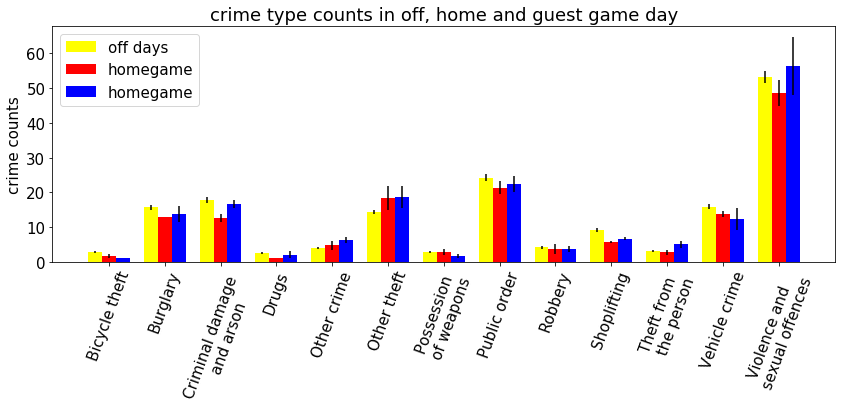

In [99]:
# create plot

crime_types = ["Bicycle theft", "Burglary", "Criminal damage \n and arson", "Drugs", "Other crime", "Other theft", "Possession \nof weapons", "Public order", "Robbery", "Shoplifting", "Theft from \n the person", "Vehicle crime", "Violence and \n sexual offences"]
n_groups = 13
fig, ax = plt.subplots()
fig.set_size_inches((12, 6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(x = index, height = off_crime_type_counts, yerr = off_crime_type_sem, width = bar_width, 
                 color='yellow', label='off days')

rects2 = plt.bar(x = index + bar_width, height = home_crime_type_counts, yerr = home_crime_type_sem, width = bar_width, 
                 color='red', label='homegame')

rects2 = plt.bar(x = index + 2*bar_width, height = guest_crime_type_counts, yerr = guest_crime_type_sem, width = bar_width,
                 color='blue', label='homegame')


plt.ylabel('crime counts')
plt.title('crime type counts in off, home and guest game day')
plt.xticks(index + bar_width, crime_types, rotation = 70)
plt.legend()

plt.tight_layout()
plt.show()


In [116]:
from scipy.stats import ttest_ind_from_stats

crime_type = ["Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", 
              "Possession of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", 
              "Vehicle crime", "Violence and sexual offences"]

diff_off_home = []

for i in np.arange(13):
    t, p = ttest_ind_from_stats(mean1 = off_crime_type_counts[i], std1 = off_crime_type_std[i], nobs1 = 25, 
                                mean2 = home_crime_type_counts[i], std2 = home_crime_type_std[i], nobs2 =  3)
    if p <0.05:
        diff_off_home.append([i, p, crime_type[i]])

              
diff_off_home            

[[array([0.04560405]), 'Criminal damage and arson'],
 [array([0.02994693]), 'Drugs'],
 [array([0.04590377]), 'Other theft'],
 [array([0.04940925]), 'Shoplifting']]

In [ ]:
# plot the crime changes which are significant different between the off day and game day



In [117]:
diff_off_guest = []

for i in np.arange(13):
    t, p = ttest_ind_from_stats(mean1 = off_crime_type_counts[i], std1 = off_crime_type_std[i], nobs1 = 25, 
                                mean2 = guest_crime_type_counts[i], std2 = guest_crime_type_std[i], nobs2 =  3)
    if p <0.05:
        diff_off_guest.append([p, crime_type[i]])

              
diff_off_guest       

[[array([0.00721497]), 'Other crime'], [array([0.02804213]), 'Other theft']]

In [ ]:
home_crime_type_percentage_change = 100*(home_crime_type_counts-off_crime_type_counts)/off_crime_type_counts
home_crime_type_percentage_change

In [67]:
guest_crime_type_percentage_change = 100*(guest_crime_type_counts-off_crime_type_counts)/off_crime_type_counts
guest_crime_type_percentage_change

array([[-63.93442623, -12.6172208 ,  -6.78598061, -22.03389831,
         63.23024055,  31.45539906, -39.89071038,  -7.5607064 ,
        -11.85897436, -27.21979622,  66.66666667, -22.33417296,
          5.96940055]])

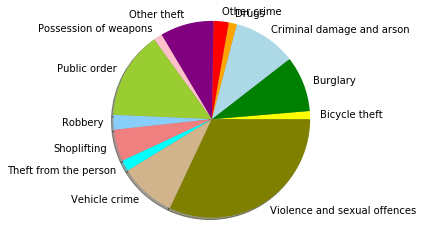

In [137]:
# pie chart for crime type

pies = ["Bicycle theft", "Burglary", "Criminal damage and arson", "Drugs", "Other crime", "Other theft", "Possession of weapons", "Public order", "Robbery", "Shoplifting", "Theft from the person", "Vehicle crime", "Violence and sexual offences"]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral", "cyan", "tan", "olive"]

plt.pie(crime_type_counts, labels=pies, colors=colors, shadow=True)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show() 

In [168]:
#Group the data by types, off day

grouped_type_off = mc_off_game.groupby(['Type'])

crime_type_counts_off = grouped_type_off['CrimeTS'].mean()

crime_type_counts_off 



DataError: No numeric types to aggregate

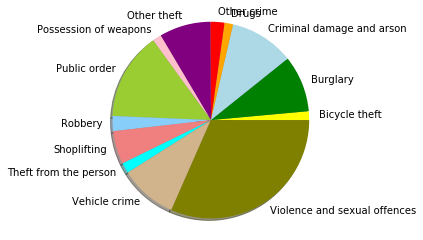

In [138]:
#Group the data by types, off game days

plt.pie(crime_type_counts_off, labels=pies, colors=colors, shadow=True)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show() 

In [167]:
#Group the data by types, home game

grouped_type_home = mc_home_game.groupby(['Type'])

crime_type_counts_home = grouped_type_home['CrimeTS'].mean()

crime_type_counts_home 

DataError: No numeric types to aggregate

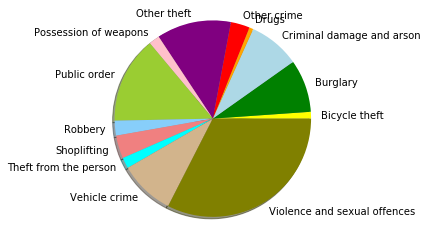

In [141]:
#Group the data by types, home game days

plt.pie(crime_type_counts_home, labels=pies, colors=colors, shadow=True)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show() 

In [137]:
# Crime Heatmap for off day

import gmaps
from config import gkey

# lat and lon of the crime location
off_day_location = mc_off_game[['Latitude', 'Longitude']]

# lat and lon of the two statiums
etihad_stadium = [53.4831, -2.2004,]
old_trafford = [53.4631, -2.2913,]
marker_locations = [etihad_stadium, old_trafford]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(off_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [138]:
# Crime Heatmap for home game 

import gmaps
from config import gkey

# lat and lon of the crime location
game_day_location = mc_home_game[['Latitude', 'Longitude']]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(game_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [139]:
# Crime Heatmap for guest game 

# lat and lon of the crime location
guest_day_location = mc_guest_game[['Latitude', 'Longitude',]]

gmaps.configure(api_key=gkey)
fig = gmaps.figure(map_type='ROADMAP')
heatmap_layer = gmaps.heatmap_layer(guest_day_location)
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))